Dataset preview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Missing values in the dataset:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Dataset description:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000  

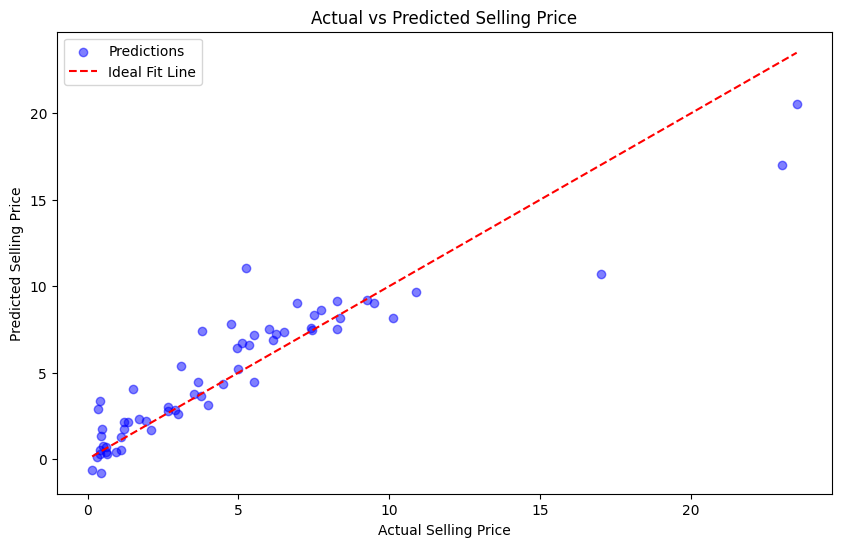

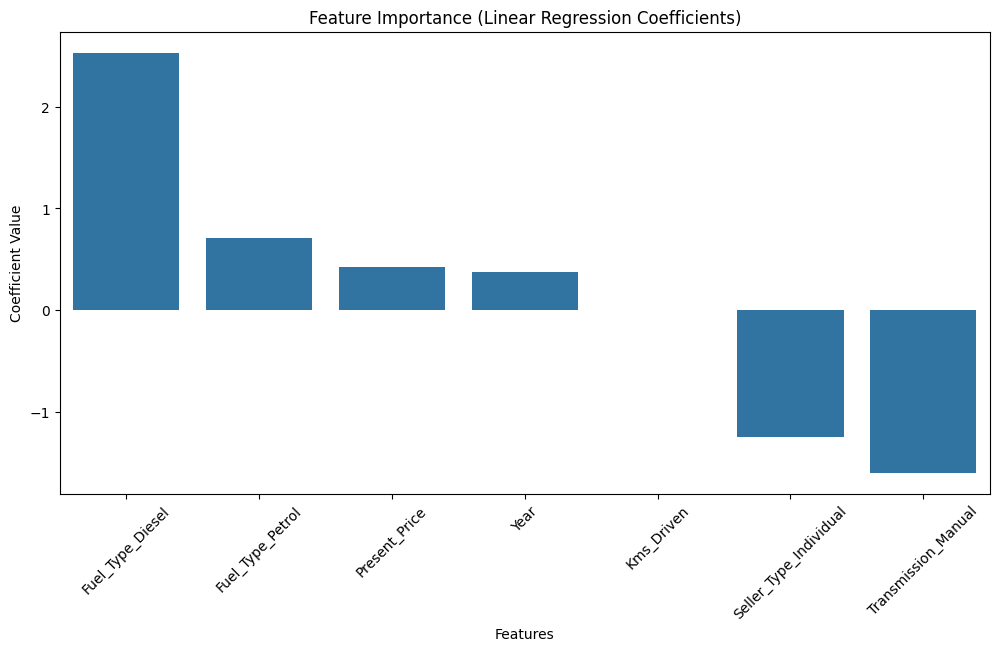

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
# Replace the path with the path to your CSV file
data = pd.read_csv('car-data.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if necessary)
data.dropna(inplace=True)

# Display dataset summary
print("\nDataset description:")
print(data.describe())

# Convert categorical variables to numeric using one-hot encoding
# This step ensures that categorical variables are encoded properly for regression
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Drop unnecessary columns that do not contribute to the prediction
data.drop(columns=['Car_Name', 'Owner'], inplace=True)

# Define features (X) and target variable (y)
X = data.drop('Selling_Price', axis=1)  # Features
y = data['Selling_Price']              # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Calculate train and test accuracy
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

# Plotting the results: Actual vs Predicted Selling Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit Line')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.show()

# Visualize feature importance using coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


